# PHYS591000 in 2022
# Lab 09
---
## Goal 
In lab 09, we will practice CNN:

* Build a Convolutional Neural Network
* Try to understand how or why CNN learned
    * Visualize filters
    * Visualize feature maps


Reference: [Deep Learning: Chapter 9](https://www.deeplearningbook.org/contents/convnets.html)

## Introduction

We will still take a W/Z jets v.s Quark jets to be an example, like Week06 and Week07.

The W/Z jets images are labeled to `0` and quark jets images are labeled to `1`.   

[Keras](https://keras.io) is a friendly package for beginner. You can easily build a sequential architecture for training.

---
* **Data Desctiption:**

In the `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders, we have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `Test_1_channel`) to record the **PATH** and **label** for each image.

We have two kinds of images. One is W/Z jet image. The other is quark jet image.  
They are 1-channel images made by charged transverse momentum.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.

Each jet is clustered by anti-kt algorithm with R=0.8 and transverse momentum is greater than 200 GeV.  
The resolution for jet image is 40X40 pixels and in 1.5RX1.5R range.   
Then, we align the jet axis. 
They are also passed prerocessing: normalized and standardized.  
For further detail, you can find in references.



---

> **Reference**   
> 1. [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)  
> 2. [Boosting H→bb¯ with Machine Learning](https://arxiv.org/abs/1807.10768)
> 3. [Jet Algorithm](https://arxiv.org/pdf/1302.0260.pdf)
> 4. [Deep Learning: Chapter 7 Regularization for Deep Learning](https://www.deeplearningbook.org/contents/regularization.html)
> 5. [Keras.io](https://keras.io)
> 6. [Example of CNN in TensorFlow 2](https://www.tensorflow.org/tutorials/images/cnn)
> 7. [A Comprehensive Guide to Convolutional Neural Networks ](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
from tqdm import tqdm
%config InlineBackend. figure_format = 'retina'


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname in os.listdir('/kaggle/input/phys591000-2022-week09/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-2022-week09/'+ dirname):
        print(filename)
    print("\n")



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Test_1_channel /
Jet_Images_1
test_dict.csv


Train_1_channel /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3


Validation_1_channel /
Jet_Images_1
val_dict.csv




---

### 1.0 Load Data and Preprocessing

* We will load data and label in the  `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders.
* Please load top 10,000 data in `Train_1_channel` folder.
* Please load top 1,000 data in `Validation_1_channel` folder.
* Please load top 1,000 data in `Test_1_channel` folder.

**This part is the same as Week06 and Week07, so please just run this cell to collect training, validation and test dataset.**



In [2]:
##############################################################################
# Code for 1.0
##############################################################################
"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-2022-week09/"


def load_dic(file_path: str)-> pd.DataFrame:

        dict_file = pd.read_csv(file_path)
        print("\n")
        print("Top 10 event infomation")
        print(dict_file.head(10))

        return dict_file

"""
Load a dictionary: "train_dict.csv" in the "Train_1_channel" folder.
"""
train_dict = load_dic(path + "/Train_1_channel/train_dict.csv")

"""
Load a dictionary: "val_dict.csv" in the "Validation_1_channel" folder.
"""
val_dict = load_dic(path + "/Validation_1_channel/val_dict.csv")

"""
Load a dictionary: "test_dict.csv" in the "Test_1_channel" folder.
"""
test_dict = load_dic(path + "/Test_1_channel/test_dict.csv")



def load_data(dict_file: pd.DataFrame, N: int, data_folder_name: str)-> np.array:
        """
        collect N jet images and labels based on a dictionary: "dict_file" in a folder: "data_folder_name" into two numpy arrays: X, Y
        """
        jet_img = []
        for i in tqdm(range(N)):
                x_jet_path = path + "/" +str(data_folder_name)+ "/" + dict_file["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                x_jet_tmp =  np.nan_to_num(x_jet_tmp)
                jet_img.append(x_jet_tmp)


        X = np.array(jet_img) 
        Y = dict_file["Y"][:N]
        
        time.sleep(1)

        return X, Y

x_train_jet, target_train = load_data(train_dict, 10000, "Train_1_channel")

x_val_jet, target_val = load_data(val_dict, 1000, "Validation_1_channel")

x_test_jet, target_test = load_data(test_dict, 1000, "Test_1_channel")


"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the training data set.".format(len(target_train[target_train==0])))
print("There are {} quark jets in the training data set.".format(len(target_train[target_train==1])))


print("\n")
print("There are {} W/Z jets in the validation data set.".format(len(target_val[target_val==0])))
print("There are {} quark jets in the validation data set.".format(len(target_val[target_val==1])))

print("\n")
print("There are {} W/Z jetsin the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))

##############################################################################



Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  1
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  1
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  0
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  1


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  0
1   Jet_Images_1/x_val_jet_2.npz  1
2   Jet_Images_1/x_val_jet_3.npz  1
3   Jet_Images_1/x_val_jet_4.npz  0
4   Jet_Images_1/x_val_jet_5.npz  0
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  1
8   Jet_Images_1/x_val_jet_9.npz  1
9  Jet_Images_1/x_val_jet_10.npz  1


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  0
1   Jet_Images_1/x_test_jet_2.npz 

100%|██████████| 1000/1000 [00:06<00:00, 156.32it/s]




There are 4918 W/Z jets in the training data set.
There are 5082 quark jets in the training data set.


There are 503 W/Z jets in the validation data set.
There are 497 quark jets in the validation data set.


There are 512 W/Z jetsin the test data set.
There are 488 quark jets in the test data set.


---

###  1.1

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Bulid a CNN Architecture and Training

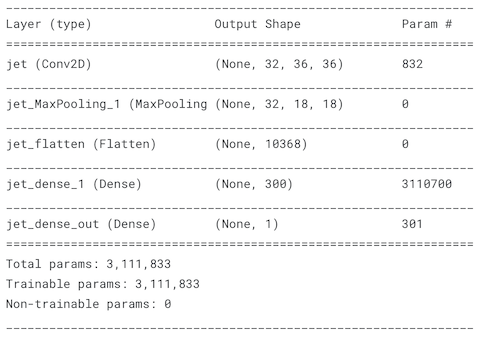

* Please create a CNN architecture as following.
    * input_shape = (1,40,40) ->    
        2D Convolutional layer (filters=32, kernel_size=(5, 5), strides=(1, 1)) ->   
        MaxPooling layer (pool_size=(2, 2), strides=(2, 2)) ->   
        Flatten ->    
        Dense layer with 300 neurons ->   
        Output Dense layer with 1 neuron 

* **RELU** will be activation function for each hidden layer, and **sigmoid** will be the activation function for output layer.
* `Adadelta` will be the optimizer and `binary_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=100`.
    * x = x_train_jet, 
    * y = target_train,
    * validation_data= (x_val_jet, target_val)
* Please save your model and name it to be `model_CNN.h5`.



[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)        
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Sigmoid function in Wiki](https://en.wikipedia.org/wiki/Sigmoid_function)   
[Ref: Adadelta Keras api ](https://keras.io/api/optimizers/adadelta/)   
[Ref: Binary Crossentropy Keras api ](https://keras.io/api/losses/probabilistic_losses/)   
[Ref: Cross Entropy in Wiki](https://en.wikipedia.org/wiki/Cross_entropy)    


> ***You may have error arised from this issue***   
[Ref: Understanding Memory Formats: NHWC or NCHW](https://oneapi-src.github.io/oneDNN/dev_guide_understanding_memory_formats.html)   
[Ref: Graphical NCHW and NHWC data formats](https://www.codetd.com/en/article/11877820)


In [3]:
%%time
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell

from tensorflow.keras.models import Sequential
# Import all layers!
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adadelta


model = Sequential()
# build a CNN model, input shape channel = 1 for gray scale
# model.add(Reshape((1,40,40), input_shape=(1,40,40)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', data_format="channels_first", input_shape=(1,40,40)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
#model.add(Dropout(0.1))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

# Print model architecture
model.summary()

rec = model.fit(x_train_jet, target_train, epochs=100, batch_size=512,
          validation_data=(x_val_jet, target_val))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train_jet, target_train)))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_test_jet, target_test)))


model.save("model_CNN.h5")

##############################################################################

2022-04-14 09:30:53.063805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 09:30:53.143563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 09:30:53.144339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 09:30:53.145534: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 36, 36)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 18, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               3110700   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 3,111,833
Trainable params: 3,111,833
Non-trainable params: 0
_________________________________________________________________


2022-04-14 09:30:55.498817: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-14 09:30:56.589070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 7s 21ms/step - loss: 0.7410 - accuracy: 0.5081 - val_loss: 0.7508 - val_accuracy: 0.5020
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7358 - accuracy: 0.5101 - val_loss: 0.7451 - val_accuracy: 0.4970
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7310 - accuracy: 0.5116 - val_loss: 0.7400 - val_accuracy: 0.5050
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7266 - accuracy: 0.5176 - val_loss: 0.7351 - val_accuracy: 0.5050
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7226 - accuracy: 0.5224 - val_loss: 0.7309 - val_accuracy: 0.5120
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7190 - accuracy: 0.5280 - val_loss: 0.7269 - val_accuracy: 0.5220
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7156 - accuracy: 0.5312 - val_loss: 0.7233 - val_accuracy: 0.5330
Epoch 8/100
20/20 

---

### 1.2

Learning Curve

* Please make a learning curve of the CNN from 1.1
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

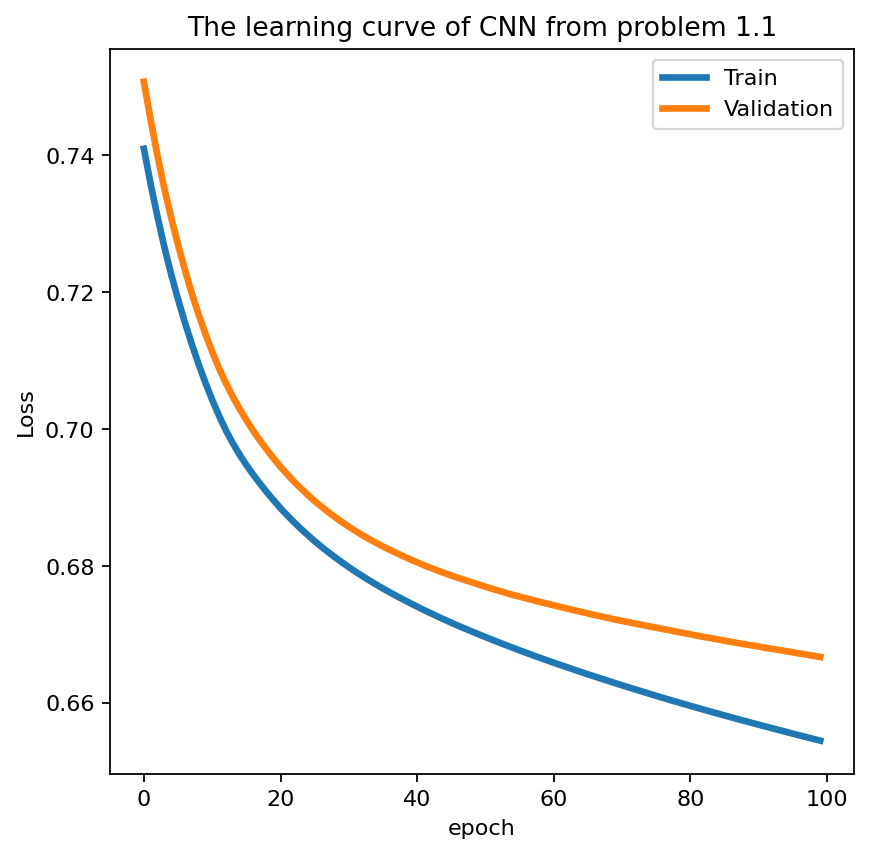

In [4]:
#############################################################################
# Code for 1.2
# 
#############################################################################
# Please code in this cell

fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of CNN from problem 1.1")
plt.plot(rec.history['loss'], lw=3, label='Train')
plt.plot(rec.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#############################################################################

---

### 1.3
Study Performance
* Please load your trained model `model_CNN.h5`.
* Please use test data set to study performance.
* Please calculate AUC.
* Please make a ROC figure.
* Please show the confusion matrix.

[Ref: Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize)

AUC of train data is: 0.7169108803503791
AUC of test data is: 0.7211793993340163


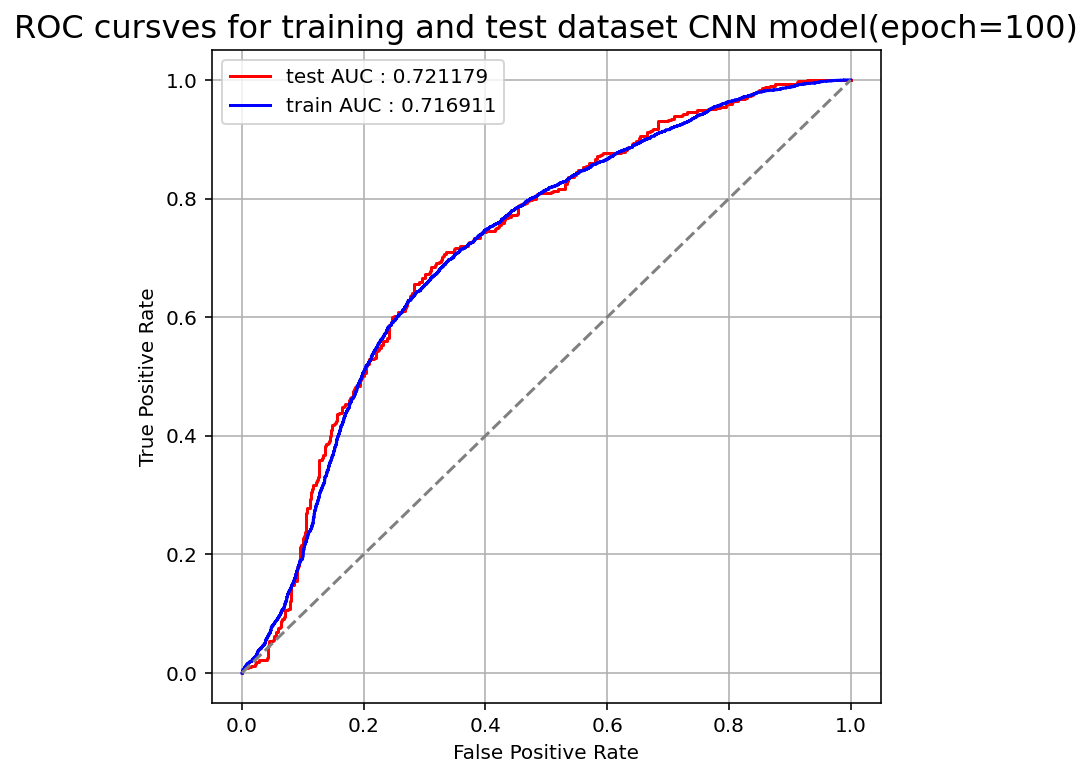

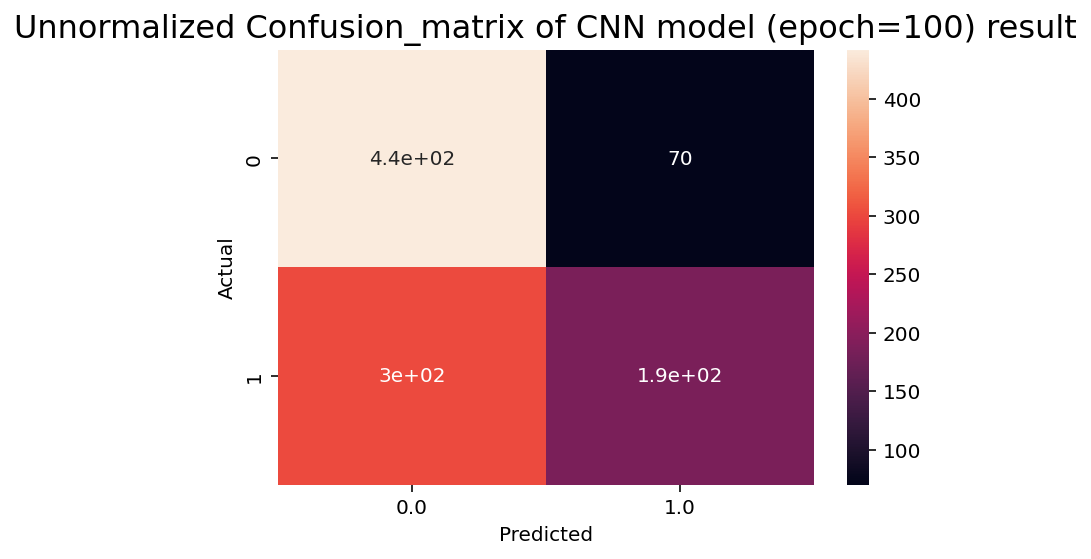

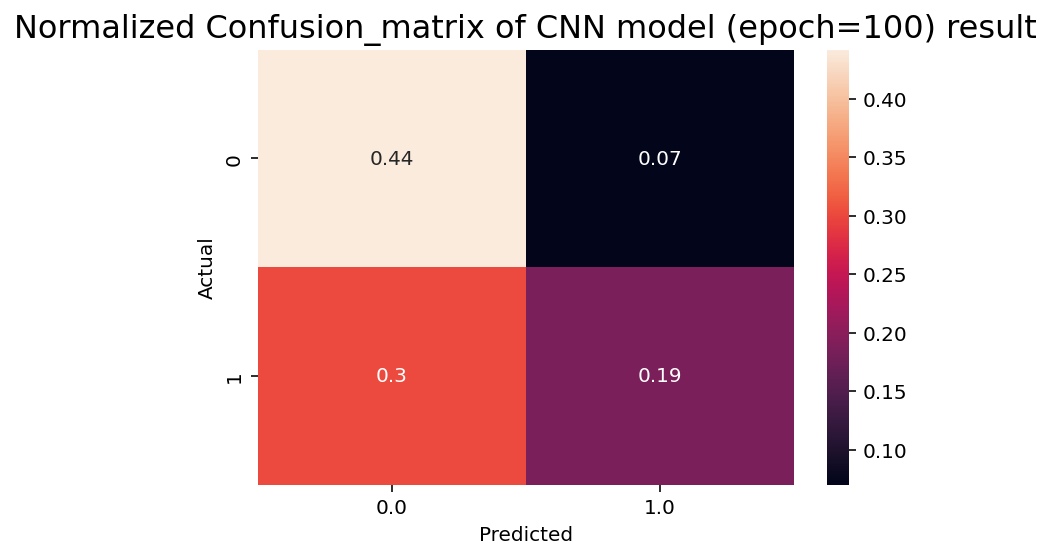

In [5]:
#############################################################################
#Code for 1.3
# 
##############################################################################
# Please code in this cell

# loading model
from tensorflow.keras.models import load_model
model = load_model('model_CNN.h5')
target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

p_train = model.predict(x_train_jet)[:,0]

fpr_train, tpr_train, thr_train = roc_curve(target_train_np, p_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

p_test = model.predict(x_test_jet)[:,0]
fpr_test, tpr_test, thr_test = roc_curve(target_test_np, p_test, pos_label=1)

roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset CNN model(epoch=100)', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

# deal with confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

p_train[p_train>0.5]=1
p_train[p_train<0.5]=0

p_test[p_test>0.5]=1
p_test[p_test<0.5]=0

# save a dataframe of test and predict
data = {'target_test': target_test_np, 'p_test': p_test }
df = pd.DataFrame(data, columns=['target_test','p_test'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'], normalize=True)

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Unnormalized Confusion_matrix of CNN model (epoch=100) result", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix1, annot=True)
plt.title("Normalized Confusion_matrix of CNN model (epoch=100) result", fontsize=16)
plt.show()


##############################################################################

---

**Let's see what CNN learned!     
In this CNN model, we have a 2D convolution layers with filter = 32 and kernel_size=(5, 5).  
There are 5X5 weights in each filter.  
If the filters is applied to input, we can have feature maps.  
Actually, training a CNN means that we update each weight based on inputs.  
We can visualize final weights on filters or feature maps to get some idea about that how or why a given prediction was made.**

[Ref: Deep Learning: Chapter 9 Convolutional Networks](https://www.deeplearningbook.org/contents/convnets.html)   
[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

### 1.4

Read each layer in your trained model 

* Please load your trained model `model_CNN.h5`. 
* Please print each layer in your trained model `model_CNN.h5`. 


[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [6]:
#############################################################################
#Code for 1.4
# 
##############################################################################
# Please code in this cell

from tensorflow.keras.models import load_model
model = load_model('model_CNN.h5')
model.summary()

##############################################################################

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 36, 36)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 18, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               3110700   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 3,111,833
Trainable params: 3,111,833
Non-trainable params: 0
_________________________________________________________________


---

### 1.5

Read weights of 32 filters

* Please pick `Conv2D` layer
* Please get weights of 32 filters:
    * print the shape of weights
    * print the shape of biases


[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)   
[Ref: get_weights method Keras api](https://keras.io/api/models/model_saving_apis/)

In [7]:
#############################################################################
#Code for 1.5
# 
##############################################################################
# Please code in this cell

# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv2d' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("shape of weights: ", filters.shape)
    print("shape of biases: ", biases.shape)

##############################################################################

shape of weights:  (5, 5, 1, 32)
shape of biases:  (32,)


---

### 1.6
Discussion for 1.6

If you finished 1.5, you may notice that:
```
shape of Conv2D weight: (5, 5, 1, 32)
shape of Conv2D bais: (32,)
```

* Please describe what is the meaning of (5, 5, 1, 32)
* Please describe what is the meaning of (32,)


[Ref: Conv2D layer Keras api](https://keras.io/api/layers/convolution_layers/convolution2d/)  
[Ref: Understanding Memory Formats: NHWC or NCHW](https://oneapi-src.github.io/oneDNN/dev_guide_understanding_memory_formats.html)   
[Ref: Graphical NCHW and NHWC data formats](https://www.codetd.com/en/article/11877820)

---
Please write your discussion in this cell: 

In the shape of Conv2D weight : (5, 5, 1, 32), we identify the kernel size as: (5,5). The number 1 in the arragment give us an idea of the kernel convolution, for instance for stride=1, we will have more operations that stride=2. Finally the number 32 in the last position shall be the number of filter.

The shape of Conv2D bais: (32,) means the assignment of 32 bias to the 32 filter's weigths. 


---

### 1.7

Visualize weights of 32 filters 

* Please pick `Conv2D` layer
* Please load or get weights of 32 filters
* Please use `plt.imshow` to draw 32 plots for weights of 32 filters.

[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)   

weights from Conv2D layer shape is: (5, 5, 1, 32)


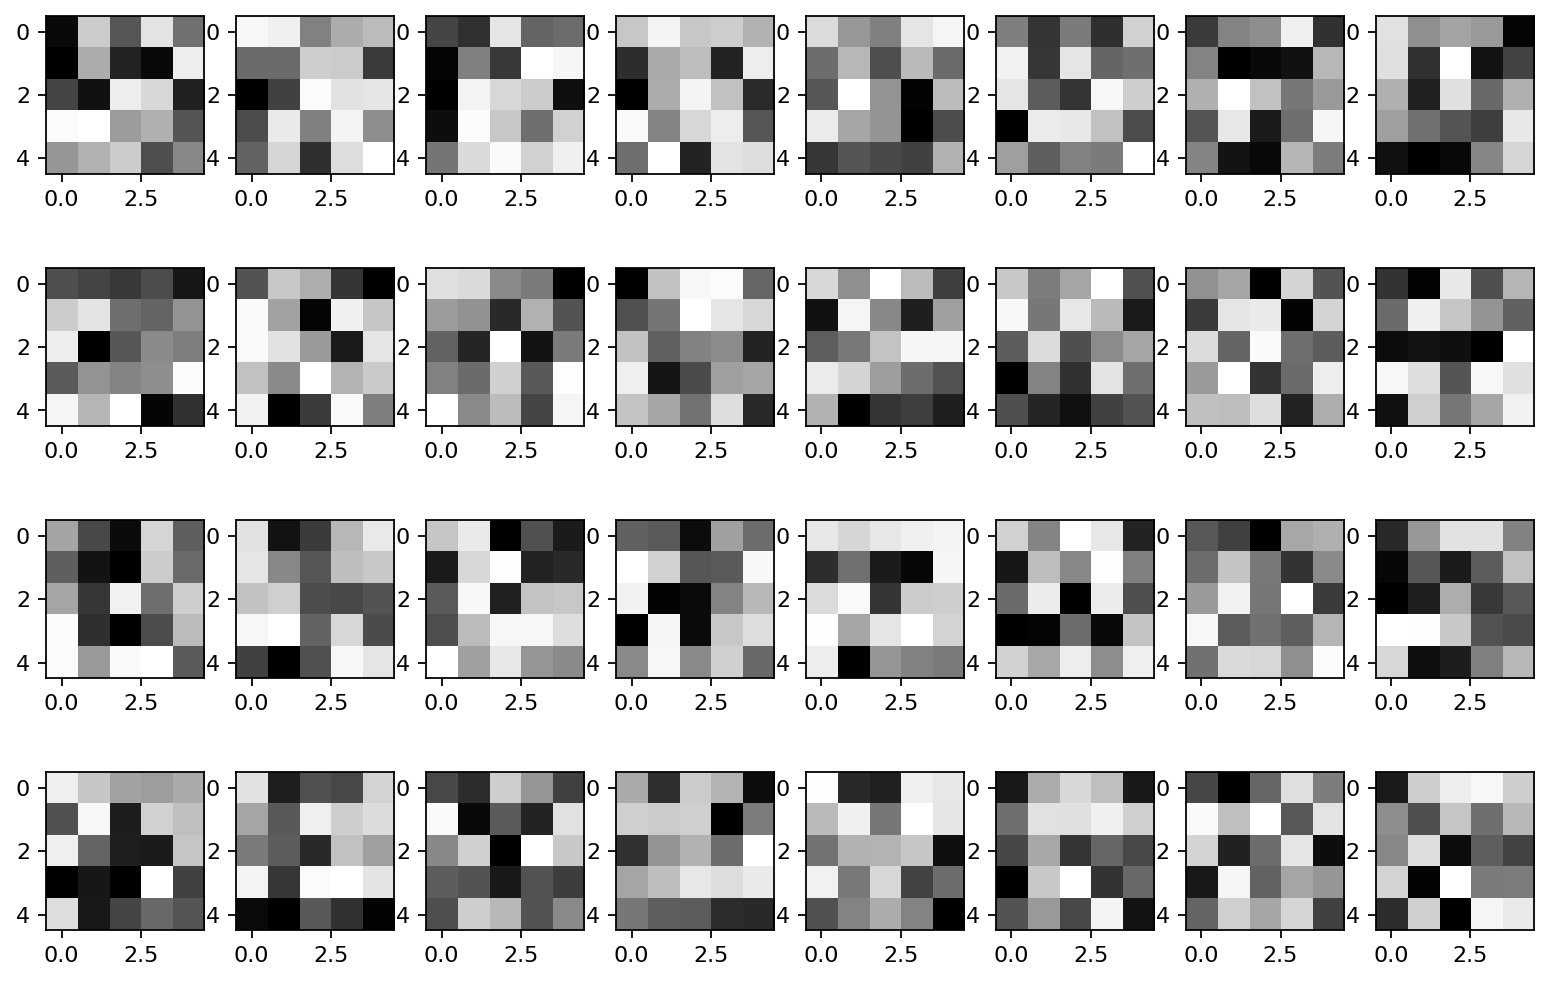

In [8]:
#############################################################################
#Code for 1.7
# 
##############################################################################
# Please code in this cell

# Visualize the filters
# Weights come in the form filters, biases = model.layers[1].get_weights()
filters, biases = model.layers[0].get_weights()
print('weights from Conv2D layer shape is:', np.array(filters).shape)
fig = plt.figure(figsize=(12,8), dpi=80)
plt.title('The weights of 32 filters')
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(filters[:,:,:,i], cmap='Greys')
plt.show()

##############################################################################

---

### 1.8

***NOTE: There are many method can finish this part, please try your best to find method.***

Create Feature Maps

* Please seperate W/Z jets/ quark jets from the training dataset (`x_train_jet`)
* Please pick `Conv2D` layer in your trained model `model_CNN.h5`
* Please apply your trained `Conv2D` layer on W/Z jets/ quark jets
    * map trained `Conv2D` layeron each W/Z jets image and then take average
    * map trained `Conv2D` layeron each quark jets image and then take average

* Please show the data shape after you apply trained `Conv2D` layer


[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)   

In [9]:
#############################################################################
#Code for 1.8
# 
##############################################################################
# Please code in this cell

wz_train = x_train_jet[target_train==0]
qu_train = x_train_jet[target_train==1]

# redefine model to Conv2D layer
from tensorflow.keras.models import Model
conv2d = Model(inputs=model.inputs, outputs=model.layers[0].output)

wz_feature = conv2d.predict(wz_train)
qu_feature = conv2d.predict(qu_train)

# getting average
wz_mean_feature = np.mean(wz_feature, axis= 0)
qu_mean_feature = np.mean(qu_feature, axis= 0)

print("The data shape of the W/Z jets image after take average is:", wz_mean_feature.shape)
print("The data shape of the quark jets image after take average is:", qu_mean_feature.shape)
##############################################################################

The data shape of the W/Z jets image after take average is: (32, 36, 36)
The data shape of the quark jets image after take average is: (32, 36, 36)


---

### 1.9

Visualize Feature Maps

* Please use `plt.imshow` to visualize the feature maps from cell 1.8
    * please plot a set of figures for W/Z jet
    * please plot a set of figures for quark jet


[Ref: How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)   

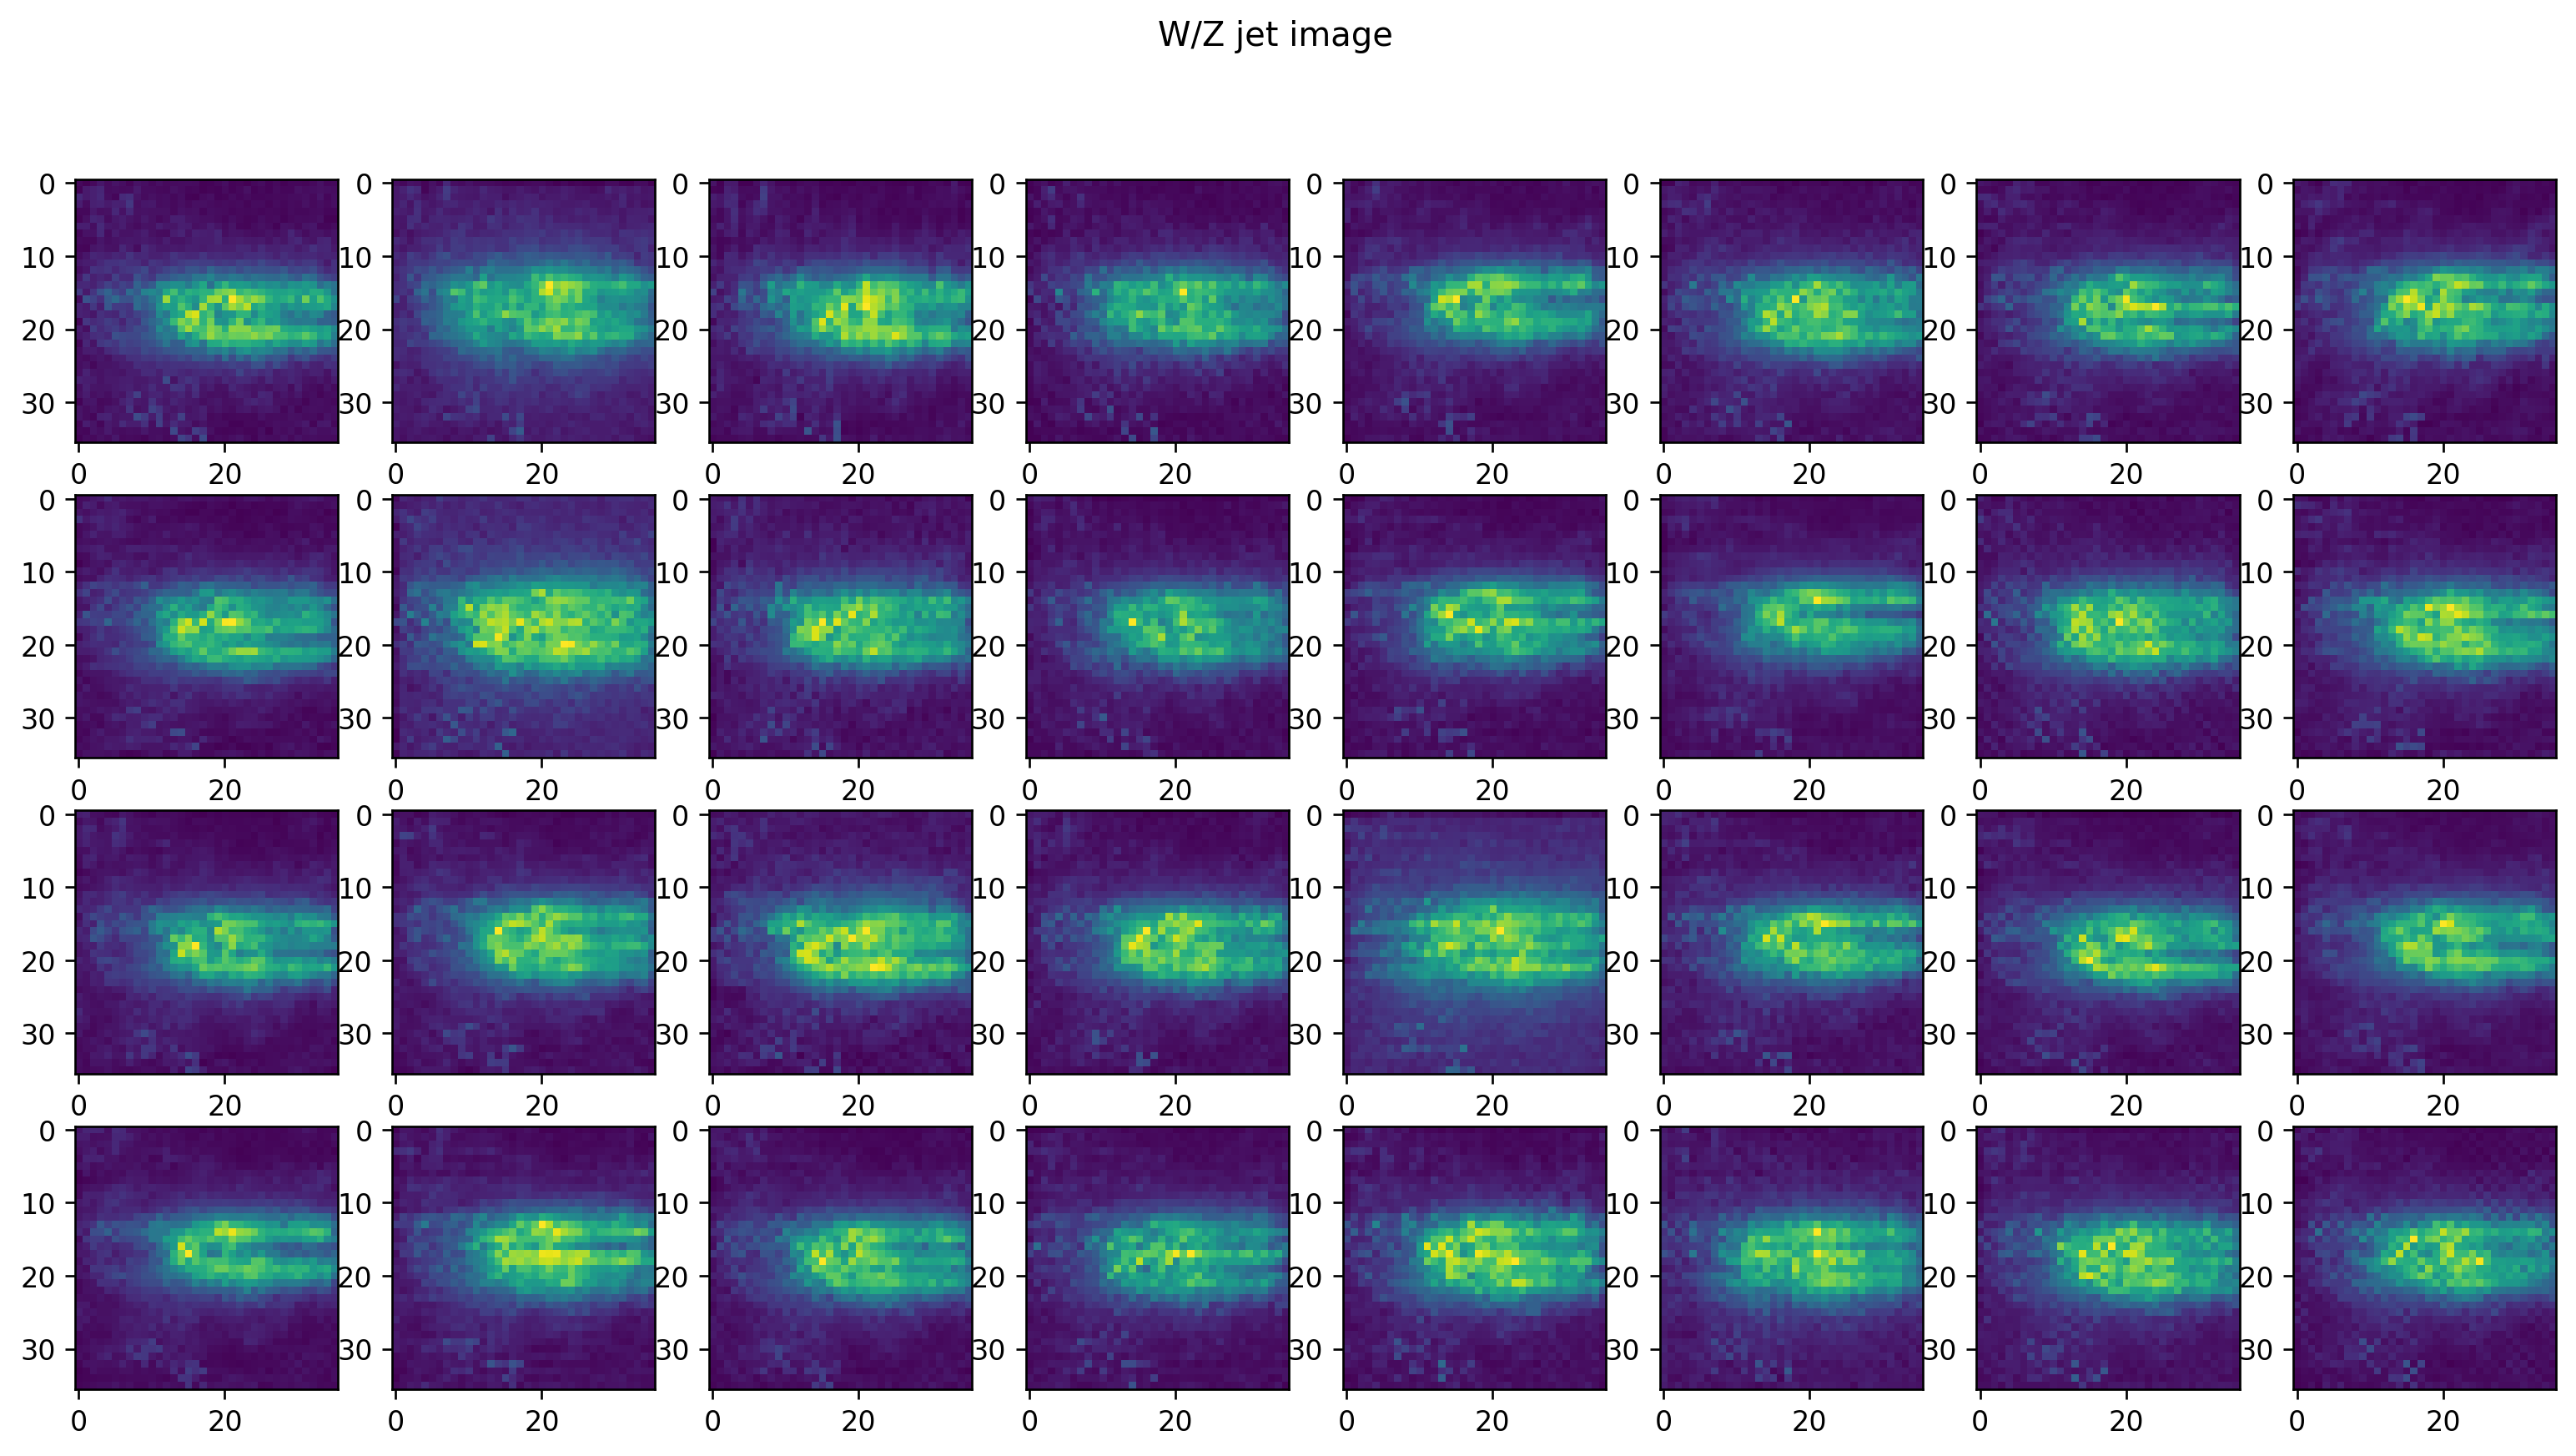

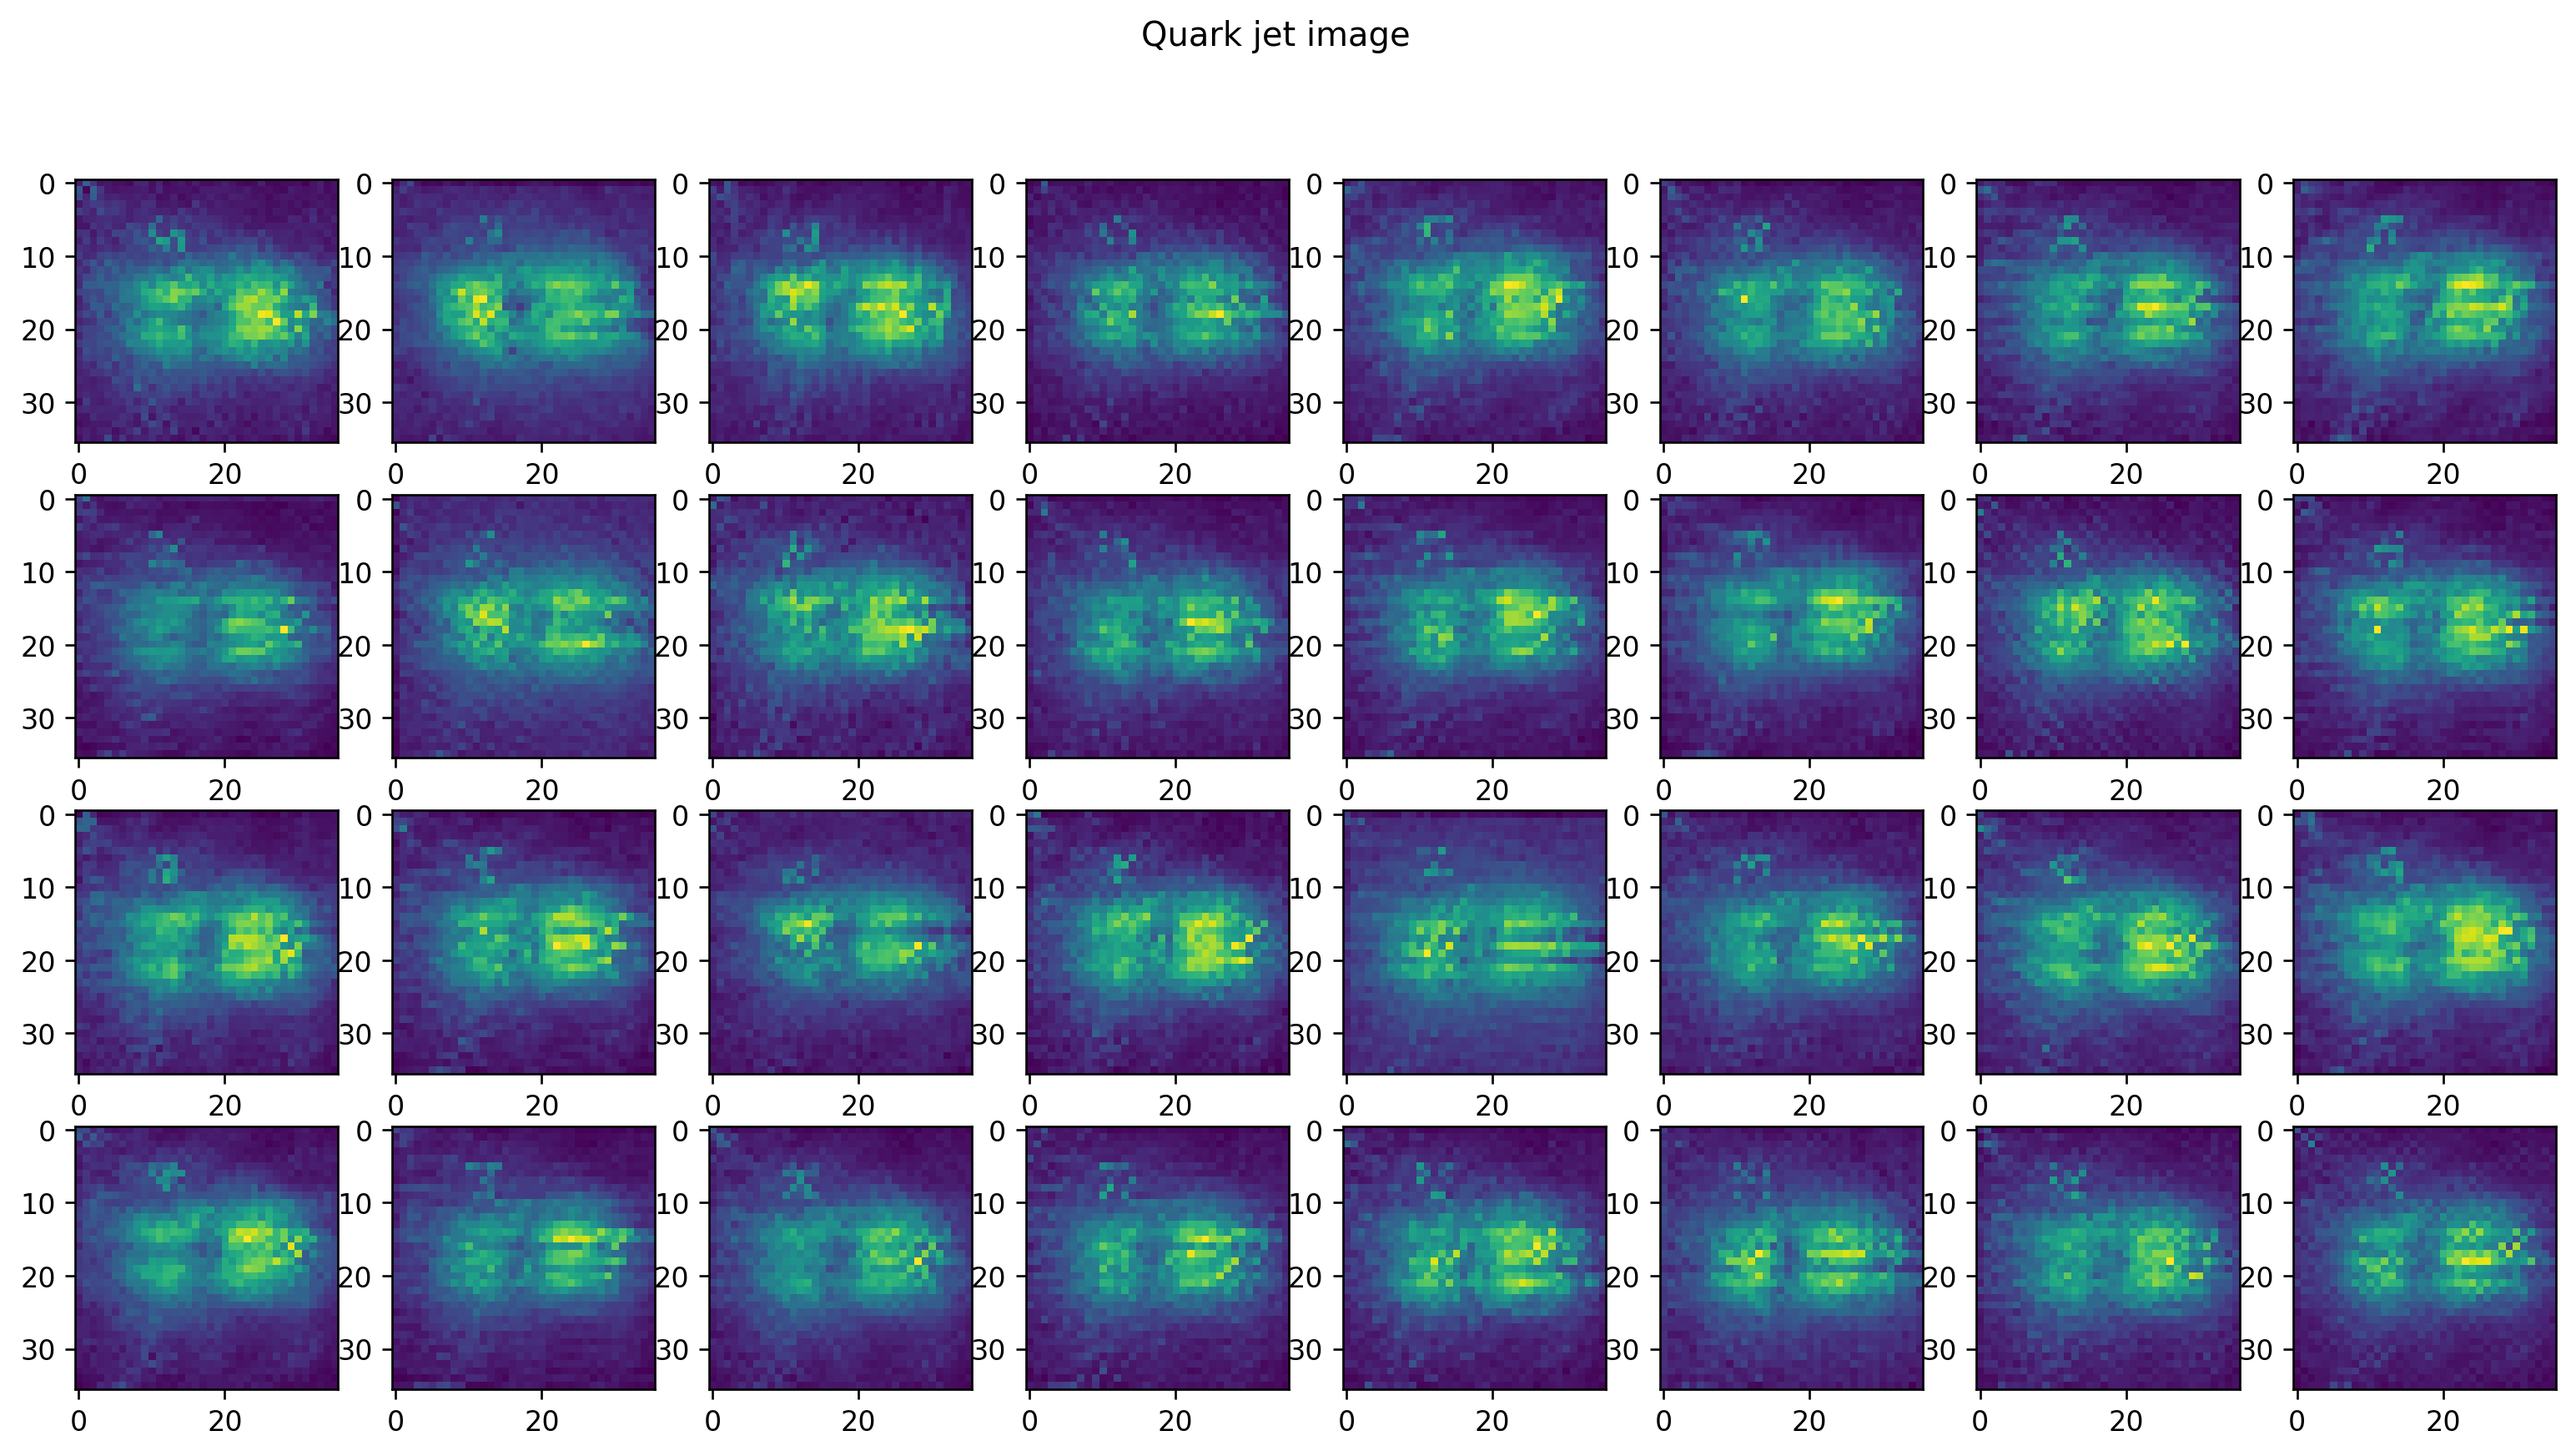

In [10]:
#############################################################################
#Code for 1.9
# 
##############################################################################
# Please code in this cell

# Visualize the filters
fig = plt.figure(figsize=(16,8), dpi=120)
plt.suptitle('W/Z jet image')
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(wz_mean_feature[i,:,:])
plt.show()

fig = plt.figure(figsize=(16,8), dpi=120)
plt.suptitle('Quark jet image')
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(qu_mean_feature[i,:,:])
plt.show()

##############################################################################

---

### 1.10
Discussion for 1.10

According to the feature maps in cell 1.9, please try your best to commnet on that how or why a given prediction from your trained CNN was made.   
**Please compare with Week06-lab_06 cell 1.3 (averaged W/Z jet and quark jet images)**

---
Please write your discussion in this cell:     

In the cell 1.9 we first predict the results by trained CNN model and get the 32 sets of images which are predicted by 32 different filters in the CNN model. Then we take the average of each set of images to get the prediction of average results for each filter.

If we compare the images from lab_06 and lab_09 we should conclude: For the W/Z jet the real plot and the prediction plot present the same tendency although there are some different  in the density of dots. In the other hand for the Quark jet images we can find a disagreement between the real and prediction plot, it could be because for Quark distribution is less concentrated that the W/Z distribution, therefore it should not be well distinguished by the CNN model.



---